Importing Libraries and Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the dataset

In [3]:
df = pd.read_csv("StudentsPerformance(CSV)")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Basic EDA

In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

1.Check missing values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

2. Check Duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicate values

3. Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


4.Checking the number of unique values in each data point

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

5. Check Statistics of dataset

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


6.Exploring data

In [ ]:
##Unique values of all categorical features

print("Categories in 'gender' variable:   ",end = " ")  
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ",end = " ")  
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end = " ")  
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ",end = " ")  
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ",end = " ")  
print(df['test preparation course'].unique())



Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [20]:
##print length of numerical and categorical features
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]  
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"Number of numerical features are  {len(num_features)}  and they are {num_features}")
print(f"Number of categorical features are  {len(categorical_features)} and they are {categorical_features}")

Number of numerical features are  3  and they are ['math score', 'reading score', 'writing score']
Number of categorical features are  5 and they are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns of 'Total Score' and 'Average'

In [21]:
##Our output feature will be 'total score' and 'average'  
df["total score"] = df["math score"] + df["reading score"] +df["writing score"]
df["average"] = df["total score"]/3  
df.head()




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
full_maths_score = df[df["math score"] == 100]['average'].count()
full_reading_score = df[df["reading score"] == 100]['average'].count()
full_writing_score = df[df["writing score"] == 100]['average'].count()

print(f"Number of Studemts with full marks in maths are : {full_maths_score}")
print(f"Number of Studemts with full marks in reading are : {full_reading_score}")
print(f"Number of Studemts with full marks in writing are : {full_writing_score}")

Number of Studemts with full marks in maths are : 7
Number of Studemts with full marks in reading are : 17
Number of Studemts with full marks in writing are : 14


In [24]:
least_maths_score = df[df["math score"] <= 20]['average'].count()
least_reading_score = df[df["reading score"] <= 20]['average'].count()
least_writing_score = df[df["writing score"] <= 20]['average'].count()

print(f"Number of Studemts with least marks in maths are : {least_maths_score}")
print(f"Number of Studemts with least marks in reading are : {least_reading_score}")
print(f"Number of Studemts with least marks in writing are : {least_writing_score}")

Number of Studemts with least marks in maths are : 4
Number of Studemts with least marks in reading are : 1
Number of Studemts with least marks in writing are : 3


 
->Students have performed worst in maths    
->Performed best in reading section

Visualisation 

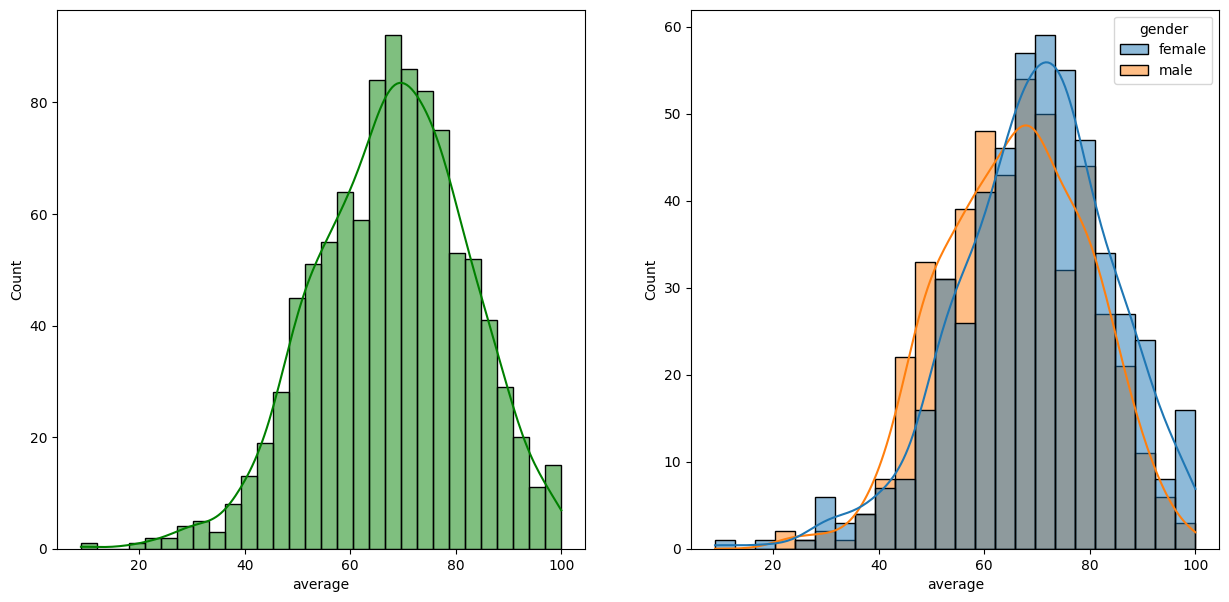

In [25]:
fig ,axs = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df , x = 'average' ,bins = 30 , kde = True,color = "g")  
plt.subplot(122)  
sns.histplot(data = df ,x = 'average' ,kde = True , hue = 'gender')  
plt.show()

<Axes: xlabel='total score', ylabel='Count'>

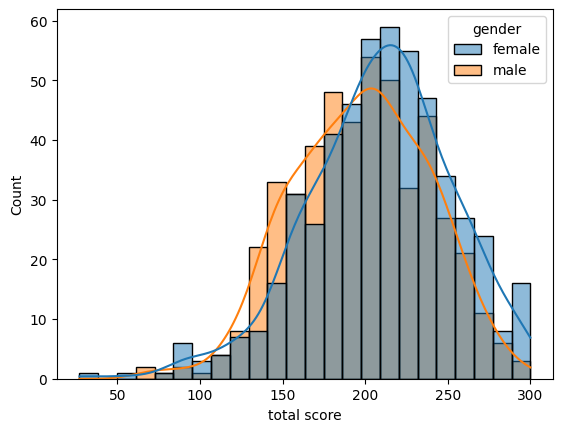

In [26]:

sns.histplot(data = df , x ="total score" , kde = True, hue = "gender")